# Analiza zbioru AmesHousing
## Kamil Skoczylas

#### 1. Analiza wstępna zawiera:
- a. analizę braków danych
- b. analizę obserwacji odstających
- c. podstawowe statystyki oraz wizualizację rozkładów zmiennych niezależnych
- d. sprawdzenie rozkładu klas zmiennej objaśnianej



In [1]:
import opendatasets as od
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
import squarify
import plotly.express as px

from ipywidgets import interact
import ipywidgets as widgets
from IPython.core.display import HTML

import phik
from phik.report import plot_correlation_matrix
from phik import report

from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
# data collecting
# this method requires you to register and generate API token ----> GO: Kaggle->Account->Create New API Token

od.download(
    "https://www.kaggle.com/datasets/prevek18/ames-housing-dataset")

Skipping, found downloaded files in ".\ames-housing-dataset" (use force=True to force download)


In [3]:
# loading data directly into df 
# dataset size < 1MB, thus loaded to memory as a whole

data = pd.read_csv('ames-housing-dataset/AmesHousing.csv')
pd.set_option('display.max_columns', None)
data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1         None           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3         None           0.0         Gd         TA     CBlock        TA   
4         None           0.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0

# 

## 1A. Analiza braków danych

# 

In [4]:
# General info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   


- Zbiór danych składa się z 82 kolumn, wliczając kolumny techniczne. 
- Liczba wierszy to 2930. 
- Istnieje wiele kolumn, których dane są wybrakowane
- Zmienne można podzielić na ilościowe, porządkowe oraz nominalne 
 

In [5]:
data_gaps = pd.DataFrame(columns=['ColumnName','ValueCount'])

i=0
for column in data.columns:
    value_count = data[column].isna().sum()
    if int(value_count) > 0:
        data_gaps.loc[i] = [column, value_count]
        i+=1

data_gaps = data_gaps.sort_values(by=['ValueCount'], ascending=False)

#data_gaps.plot(x='ColumnName', y='ValueCount', kind ='bar', color ='red')
fig = px.bar(data_gaps, x = "ColumnName", y = "ValueCount")
fig.show()

Powyżej widać, dane kolumny z lukami w danych można podzielić na 3 grupy: 
 - 1. Za dużo braków, a więc kolumny do wyrzucenia
 - 2. Braki można wypełnić (wypełnienie algorytmiczne/ pominięcie )
 - 3. Braki są minimalne (wypełnienie arbitralne/ usunięcie rekordów)

Brak informacji w pewnych przypadkach również może być informacją
 
Próg odrzucenia danych został określony arbitralnie na poziomie 300 null'i w obserwacjach

In [6]:
def plot_treeMap(data, title, column_values= 'ValueCount',column_category='ColumnName'):
    plt.figure(figsize=(16,2))
    squarify.plot(sizes=data[column_values], label=data[column_category], alpha=.5)
    plt.axis('off')
    plt.title(title,fontsize=23,fontweight="bold")
    plt.show()

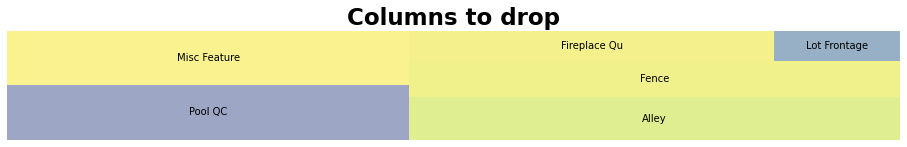

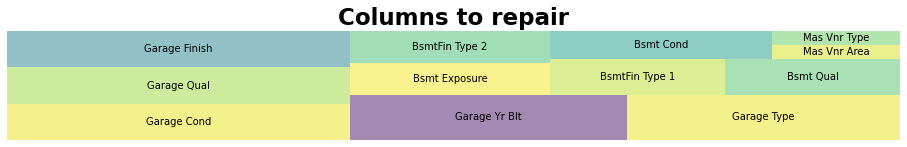

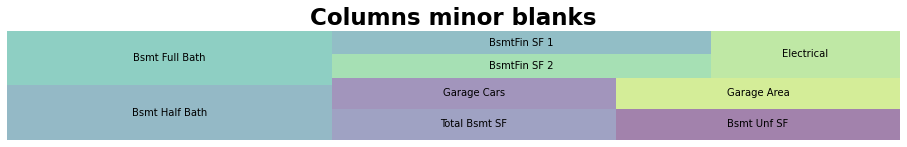

In [7]:
data_gaps_to_drop = data_gaps.where(data_gaps['ValueCount']>300).dropna()
plot_treeMap(data = data_gaps_to_drop, title= "Columns to drop")

data_gaps_to_repair = data_gaps[(data_gaps['ValueCount']<300) & (data_gaps['ValueCount']>10)]
plot_treeMap(data = data_gaps_to_repair, title= "Columns to repair")

data_gaps_minor = data_gaps[(data_gaps['ValueCount']<10)]
plot_treeMap(data = data_gaps_minor, title= "Columns minor blanks")

### Oczyszczanie danych (tylko krok 1)
#### Na potrzeby niniejszej analizy wstępnej braki w danych nie będą wypełniane

In [8]:
dropped_names = []
for row_id in range(len(data_gaps_to_drop['ColumnName'])):
    dropped_n =  str(data_gaps_to_drop['ColumnName'].iloc[row_id])
    data.drop([dropped_n], axis=1, inplace=True)
    dropped_names.append(dropped_n)
    
print('successfully dropped columns: ', dropped_names)

successfully dropped columns:  ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage']


In [9]:
data

Order        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
0         1  526301100           20        RL     31770   Pave       IR1   
1         2  526350040           20        RH     11622   Pave       Reg   
2         3  526351010           20        RL     14267   Pave       IR1   
3         4  526353030           20        RL     11160   Pave       Reg   
4         5  527105010           60        RL     13830   Pave       IR1   
...     ...        ...          ...       ...       ...    ...       ...   
2925   2926  923275080           80        RL      7937   Pave       IR1   
2926   2927  923276100           20        RL      8885   Pave       IR1   
2927   2928  923400125           85        RL     10441   Pave       Reg   
2928   2929  924100070           20        RL     10010   Pave       Reg   
2929   2930  924151050           60        RL      9627   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0             Lvl    AllPub     Corner        Gtl        NAmes        Norm   
1             Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
2             Lvl    AllPub     Corner        Gtl        NAmes        Norm   
3             Lvl    AllPub     Corner        Gtl        NAmes        Norm   
4             Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
...           ...       ...        ...        ...          ...         ...   
2925          Lvl    AllPub    CulDSac        Gtl      Mitchel        Norm   
2926          Low    AllPub     Inside        Mod      Mitchel        Norm   
2927          Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
2928          Lvl    AllPub     Inside        Mod      Mitchel        Norm   
2929          Lvl    AllPub     Inside        Mod      Mitchel        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0           Norm      1Fam      1Story             6             5   
1           Norm      1Fam      1Story             5             6   
2           Norm      1Fam      1Story             6             6   
3           Norm      1Fam      1Story             7             5   
4           Norm      1Fam      2Story             5             5   
...          ...       ...         ...           ...           ...   
2925        Norm      1Fam        SLvl             6             6   
2926        Norm      1Fam      1Story             5             5   
2927        Norm      1Fam      SFoyer             5             5   
2928        Norm      1Fam      1Story             5             5   
2929        Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
0           1960            1960        Hip   CompShg      BrkFace   
1           1961            1961      Gable   CompShg      VinylSd   
2           1958            1958        Hip   CompShg      Wd Sdng   
3           1968            1968        Hip   CompShg      BrkFace   
4           1997            1998      Gable   CompShg      VinylSd   
...          ...             ...        ...       ...          ...   
2925        1984            1984      Gable   CompShg      HdBoard   
2926        1983            1983      Gable   CompShg      HdBoard   
2927        1992            1992      Gable   CompShg      HdBoard   
2928        1974            1975      Gable   CompShg      HdBoard   
2929        1993            1994      Gable   CompShg      HdBoard   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
0         Plywood        Stone         112.0         TA         TA     CBlock   
1         VinylSd         None           0.0         TA         TA     CBlock   
2         Wd Sdng      BrkFace         108.0         TA         TA     CBlock   
3         BrkFace         None           0.0         Gd         TA     CBlock   
4         VinylSd         None           0.0         TA         TA   

# 

## 1B. Analiza obserwacji odstających

# 

In [10]:
# General stats
data.describe()

Order           PID  MS SubClass       Lot Area  Overall Qual  \
count  2930.00000  2.930000e+03  2930.000000    2930.000000   2930.000000   
mean   1465.50000  7.144645e+08    57.387372   10147.921843      6.094881   
std     845.96247  1.887308e+08    42.638025    7880.017759      1.411026   
min       1.00000  5.263011e+08    20.000000    1300.000000      1.000000   
25%     733.25000  5.284770e+08    20.000000    7440.250000      5.000000   
50%    1465.50000  5.354536e+08    50.000000    9436.500000      6.000000   
75%    2197.75000  9.071811e+08    70.000000   11555.250000      7.000000   
max    2930.00000  1.007100e+09   190.000000  215245.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   
mean       5.563140  1971.356314     1984.266553    101.896801    442.629566   
std        1.111537    30.245361       20.860286    179.112611    455.590839   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1954.000000     1965.000000      0.000000      0.000000   
50%        5.000000  1973.000000     1993.000000      0.000000    370.000000   
75%        6.000000  2001.000000     2004.000000    164.000000    734.000000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  \
count   2929.000000  2929.000000    2929.000000  2930.000000  2930.000000   
mean      49.722431   559.262547    1051.614544  1159.557679   335.455973   
std      169.168476   439.494153     440.615067   391.890885   428.395715   
min        0.000000     0.000000       0.000000   334.000000     0.000000   
25%        0.000000   219.000000     793.000000   876.250000     0.000000   
50%        0.000000   466.000000     990.000000  1084.000000     0.000000   
75%        0.000000   802.000000    1302.000000  1384.000000   703.750000   
max     1526.000000  2336.000000    6110.000000  5095.000000  2065.000000   

       Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
count      2930.000000  2930.000000     2928.000000     2928.000000   
mean          4.676792  1499.690444        0.431352        0.061134   
std          46.310510   505.508887        0.524820        0.245254   
min           0.000000   334.000000        0.000000        0.000000   
25%           0.000000  1126.000000        0.000000        0.000000   
50%           0.000000  1442.000000        0.000000        0.000000   
75%           0.000000  1742.750000        1.000000        0.000000   
max        1064.000000  5642.000000        3.000000        2.000000   

         Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
count  2930.000000  2930.000000    2930.000000    2930.000000    2930.000000   
mean      1.566553     0.379522       2.854266       1.044369       6.443003   
std       0.552941     0.502629       0.827731       0.214076       1.572964   
min       0.000000     0.000000       0.000000       0.000000       2.000000   
25%       1.000000     0.000000       2.000000       1.000000       5.000000   
50%       2.000000     0.000000       3.000000       1.000000       6.000000   
75%       2.000000     1.000000       3.000000       1.000000       7.000000   
max       4.000000     2.000000       8.000000       3.000000      15.000000   

        Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
count  2930.000000    2771.000000  2929.000000  2929.000000   2930.000000   
mean      0.599317    1978.132443     1.766815   472.819734     93.751877   
std       0.647921      25.528411     0.760566   215.046549    126.361562   
min       0.000000    1895.000000     0.000000     0.000000      0.000000   
25%       0.000000    1960.000000     1.000000   320.000000      0.000000   
50%       1.000000    1979.000000     2.000000   480.000000      0.000000   
75%

Powyższe zestawienie ma zastosowanie wyłącznie dla zmiennych ilościowych.

Najprostszym rozwiązaniem problemu obserwacji odstających byłoby pozbycie się danych wykraczających poza wyznaczone granice miar pozycyjnych. Qwartyle mogą okazać się zbyt ekstremalne. 

Statystyki zostały przeliczone również dla zmiennych porządkowych - sprawdzanie statystyk pozycyjnych dla nich nakierowane jest raczej na wychwycenie błędów w danych niż określenie kryteriów odrzucenia na podstawie miar pozycyjnych. 

In [11]:
print('Slide to check percentiles')
def f(x):
    y = x/100
    display(data.quantile(y))

interact(f, x=widgets.IntSlider(min=0, max=100, step=1, value=10));

Slide to check percentiles


interactive(children=(IntSlider(value=10, description='x'), Output()), _dom_classes=('widget-interact',))

### Zmienne nominalne

Podejście do określenia obserwacji odstających w przypadku zmiennych kategorialnych jest nieco bardziej skomplikowane ze względu na brak możliwosci bezpośredniej kwantyfikacji. Z tego względu zadecydowano, że przydatność zmiennych nominalnych na poczet przyszłych modelowań zostanie sprawdzona za pomocą korelacji względem zmiennej objaśnianej oraz względnem innych zmiennych objasniających.  

In [12]:
data_nominal_list = []
for column in data.columns:
    if data[column].dtypes == 'object':
        data_nominal_list.append(column)

print('Columns with nominal data:' , data_nominal_list)

data_nominal = pd.DataFrame()
for column in data_nominal_list:
    data_nominal[column] = data[column]
    
data_nominal['Y-SalesPrice'] = data['SalePrice']
data_nominal.head()

Columns with nominal data: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']


MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
1        RH   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0        NAmes        Norm        Norm      1Fam      1Story        Hip   
1        NAmes       Feedr        Norm      1Fam      1Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story        Hip   
3        NAmes        Norm        Norm      1Fam      1Story        Hip   
4      Gilbert        Norm        Norm      1Fam      2Story      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      BrkFace      Plywood        Stone         TA         TA   
1   CompShg      VinylSd      VinylSd         None         TA         TA   
2   CompShg      Wd Sdng      Wd Sdng      BrkFace         TA         TA   
3   CompShg      BrkFace      BrkFace         None         Gd         TA   
4   CompShg      VinylSd      VinylSd         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        Gd            Gd            BLQ            Unf   
1     CBlock        TA        TA            No            Rec            LwQ   
2     CBlock        TA        TA            No            ALQ            Unf   
3     CBlock        TA        TA            No            ALQ            Unf   
4      PConc        Gd        TA            No            GLQ            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Fa           Y      SBrkr           TA        Typ   
1    GasA         TA           Y      SBrkr           TA        Typ   
2    GasA         TA           Y      SBrkr           Gd        Typ   
3    GasA         Ex           Y      SBrkr           Ex        Typ   
4    GasA         Gd           Y      SBrkr           TA        Typ   

  Garage Type Garage Finish Garage Qual Garage Cond Paved Drive Sale Type  \
0      Attchd           Fin          TA          TA           P       WD    
1      Attchd           Unf          TA          TA           Y       WD    
2      Attchd           Unf          TA          TA           Y       WD    
3      Attchd           Fin          TA          TA           Y       WD    
4      Attchd           Fin          TA          TA           Y       WD    

  Sale Condition  Y-SalesPrice  
0         Normal        215000  
1         Normal        105000  
2         Normal        172000  
3         Normal        244000  
4         Normal        189900

W celu określenia przydatności danych nominalnych, zastosowana została korelacja 𝜙k(phik), która działa konsekwentnie między zmiennymi kategorialnymi, porządkowymi i przedziałowymi. Dodatkowo wychwytuje nieliniowe zależności. 


interval columns not set, guessing: ['Y-SalesPrice']


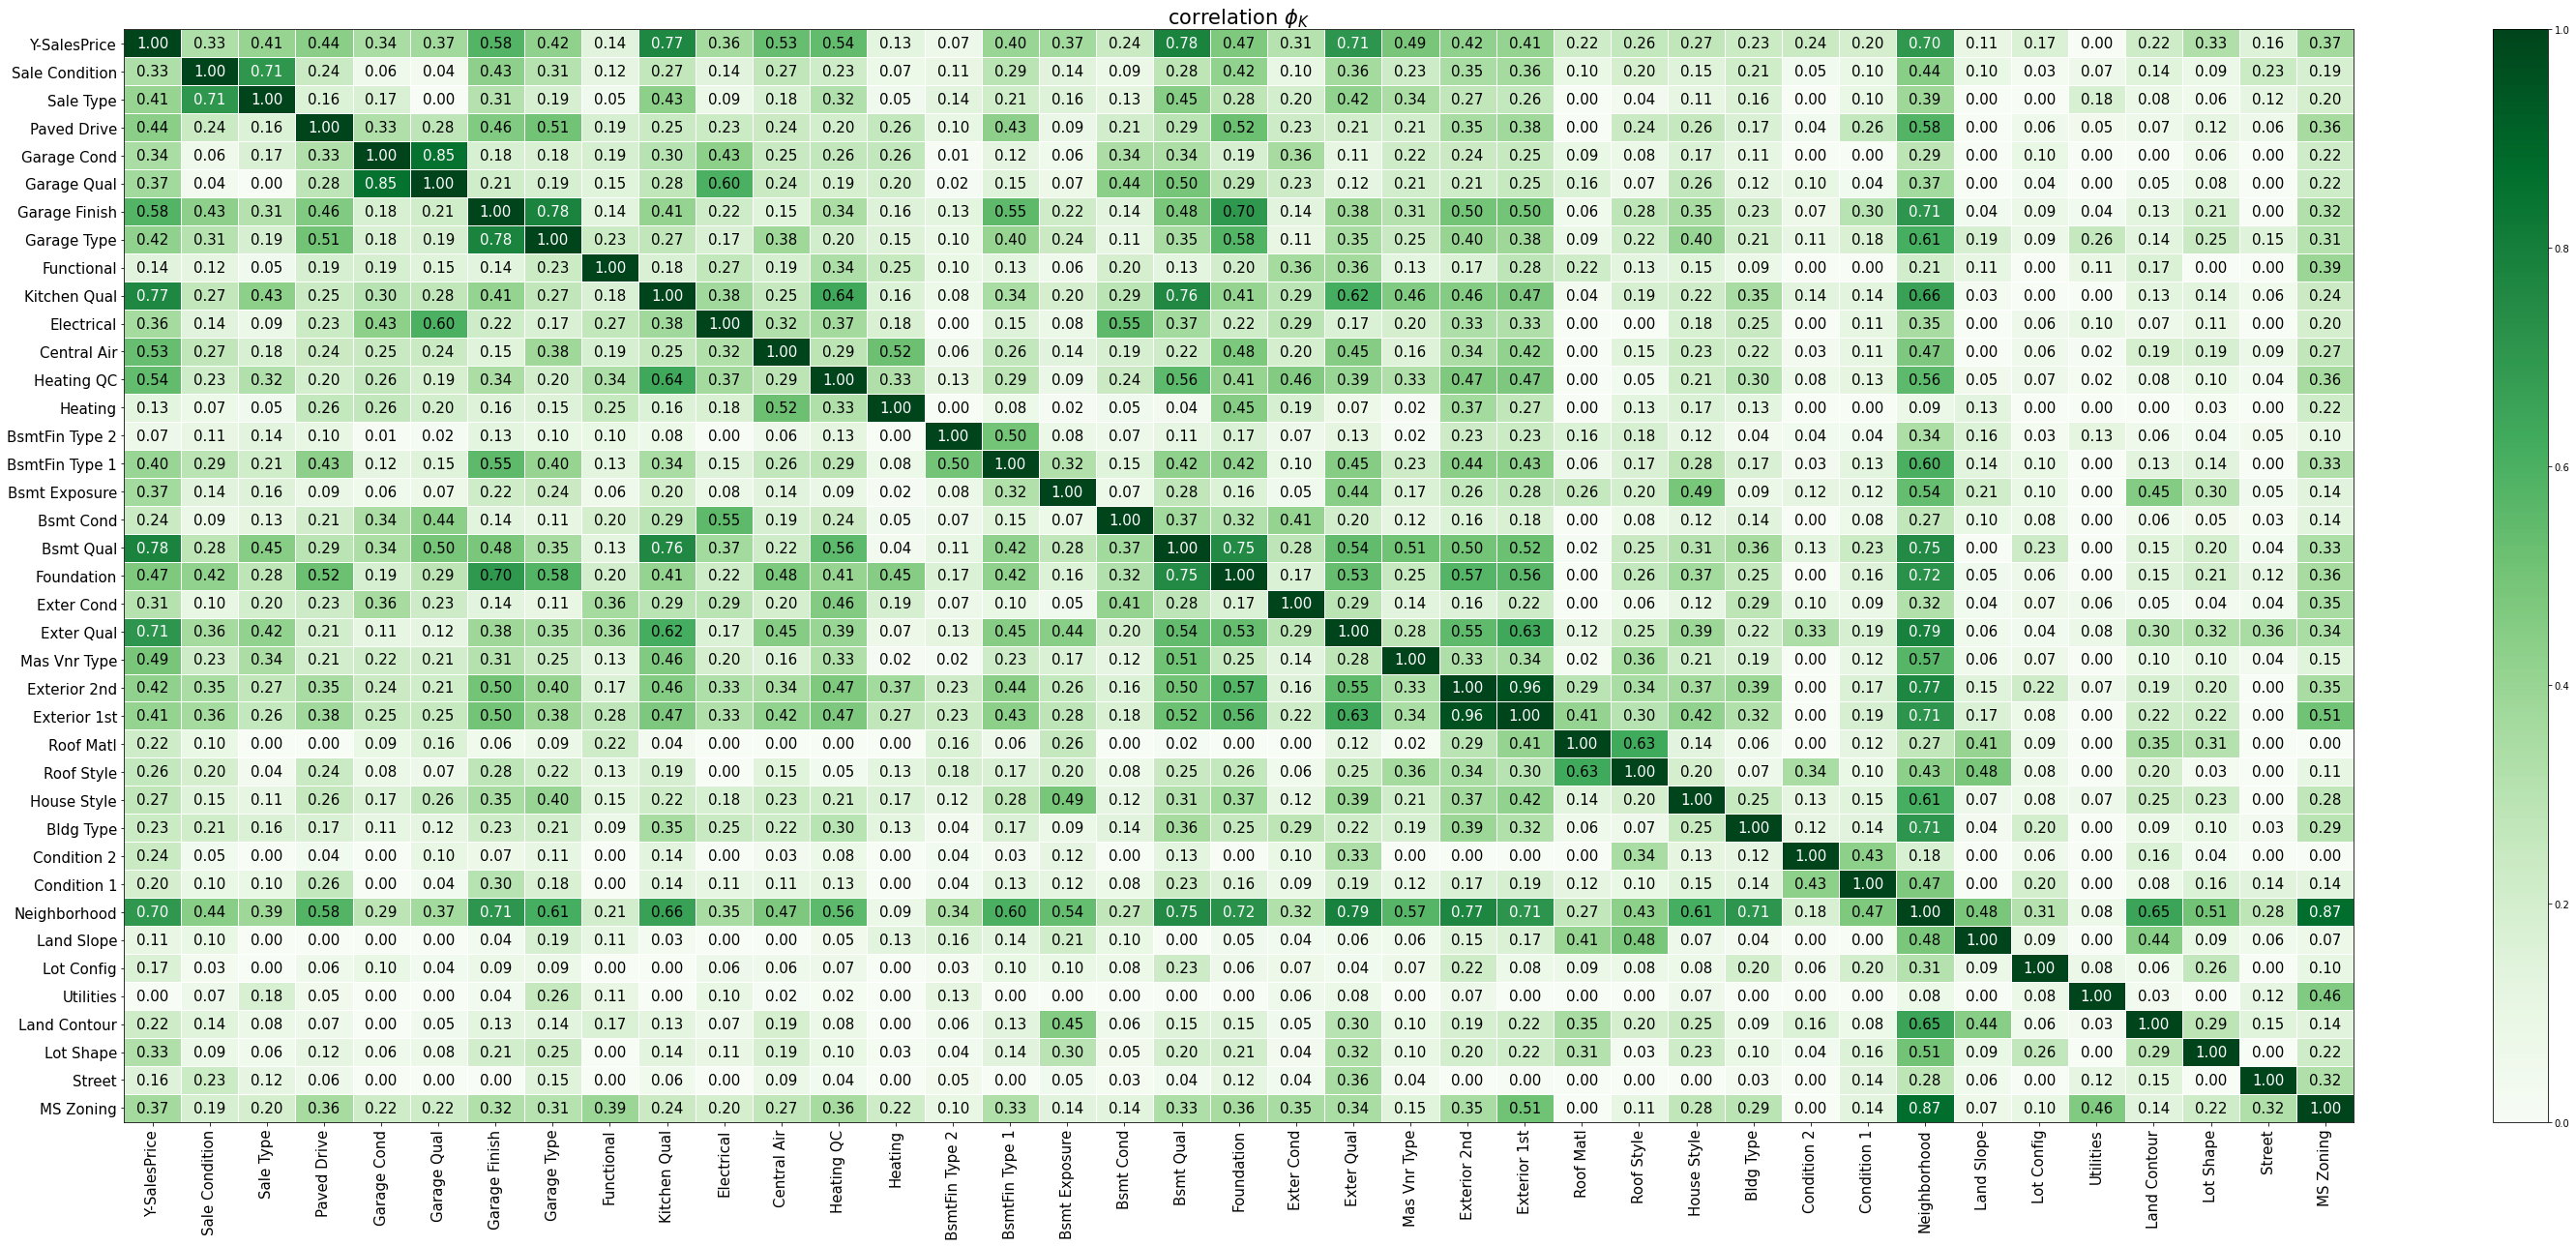

In [13]:
phik_overview = data_nominal.phik_matrix()
#phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(42, 18))
plt.tight_layout()

Zastosowanie Phik global correlation do określenia korelacji zmiennej względem wszystkich innych zmiennych w zbiorze danych.
Niewątpliwie na początku analizy warto sobie taką wizualizację wygenerować. Koncepcja wydaje się być znana z doboru zmiennych do modeli ekonometrycznych z wykorzystaniem metody [Helwiga](https://pl.wikipedia.org/wiki/Metoda_Hellwiga#:~:text=Metoda%20Hellwiga%2C%20zwana%20r%C3%B3wnie%C5%BC%20metod%C4%85,1968%20roku%20przez%20Zdzis%C5%82awa%20Hellwiga.). 

interval columns not set, guessing: ['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


c:\users\kamil\appdata\local\programs\python\python39\lib\site-packages\phik\phik.py:319: RuntimeWarning:

invalid value encountered in sqrt



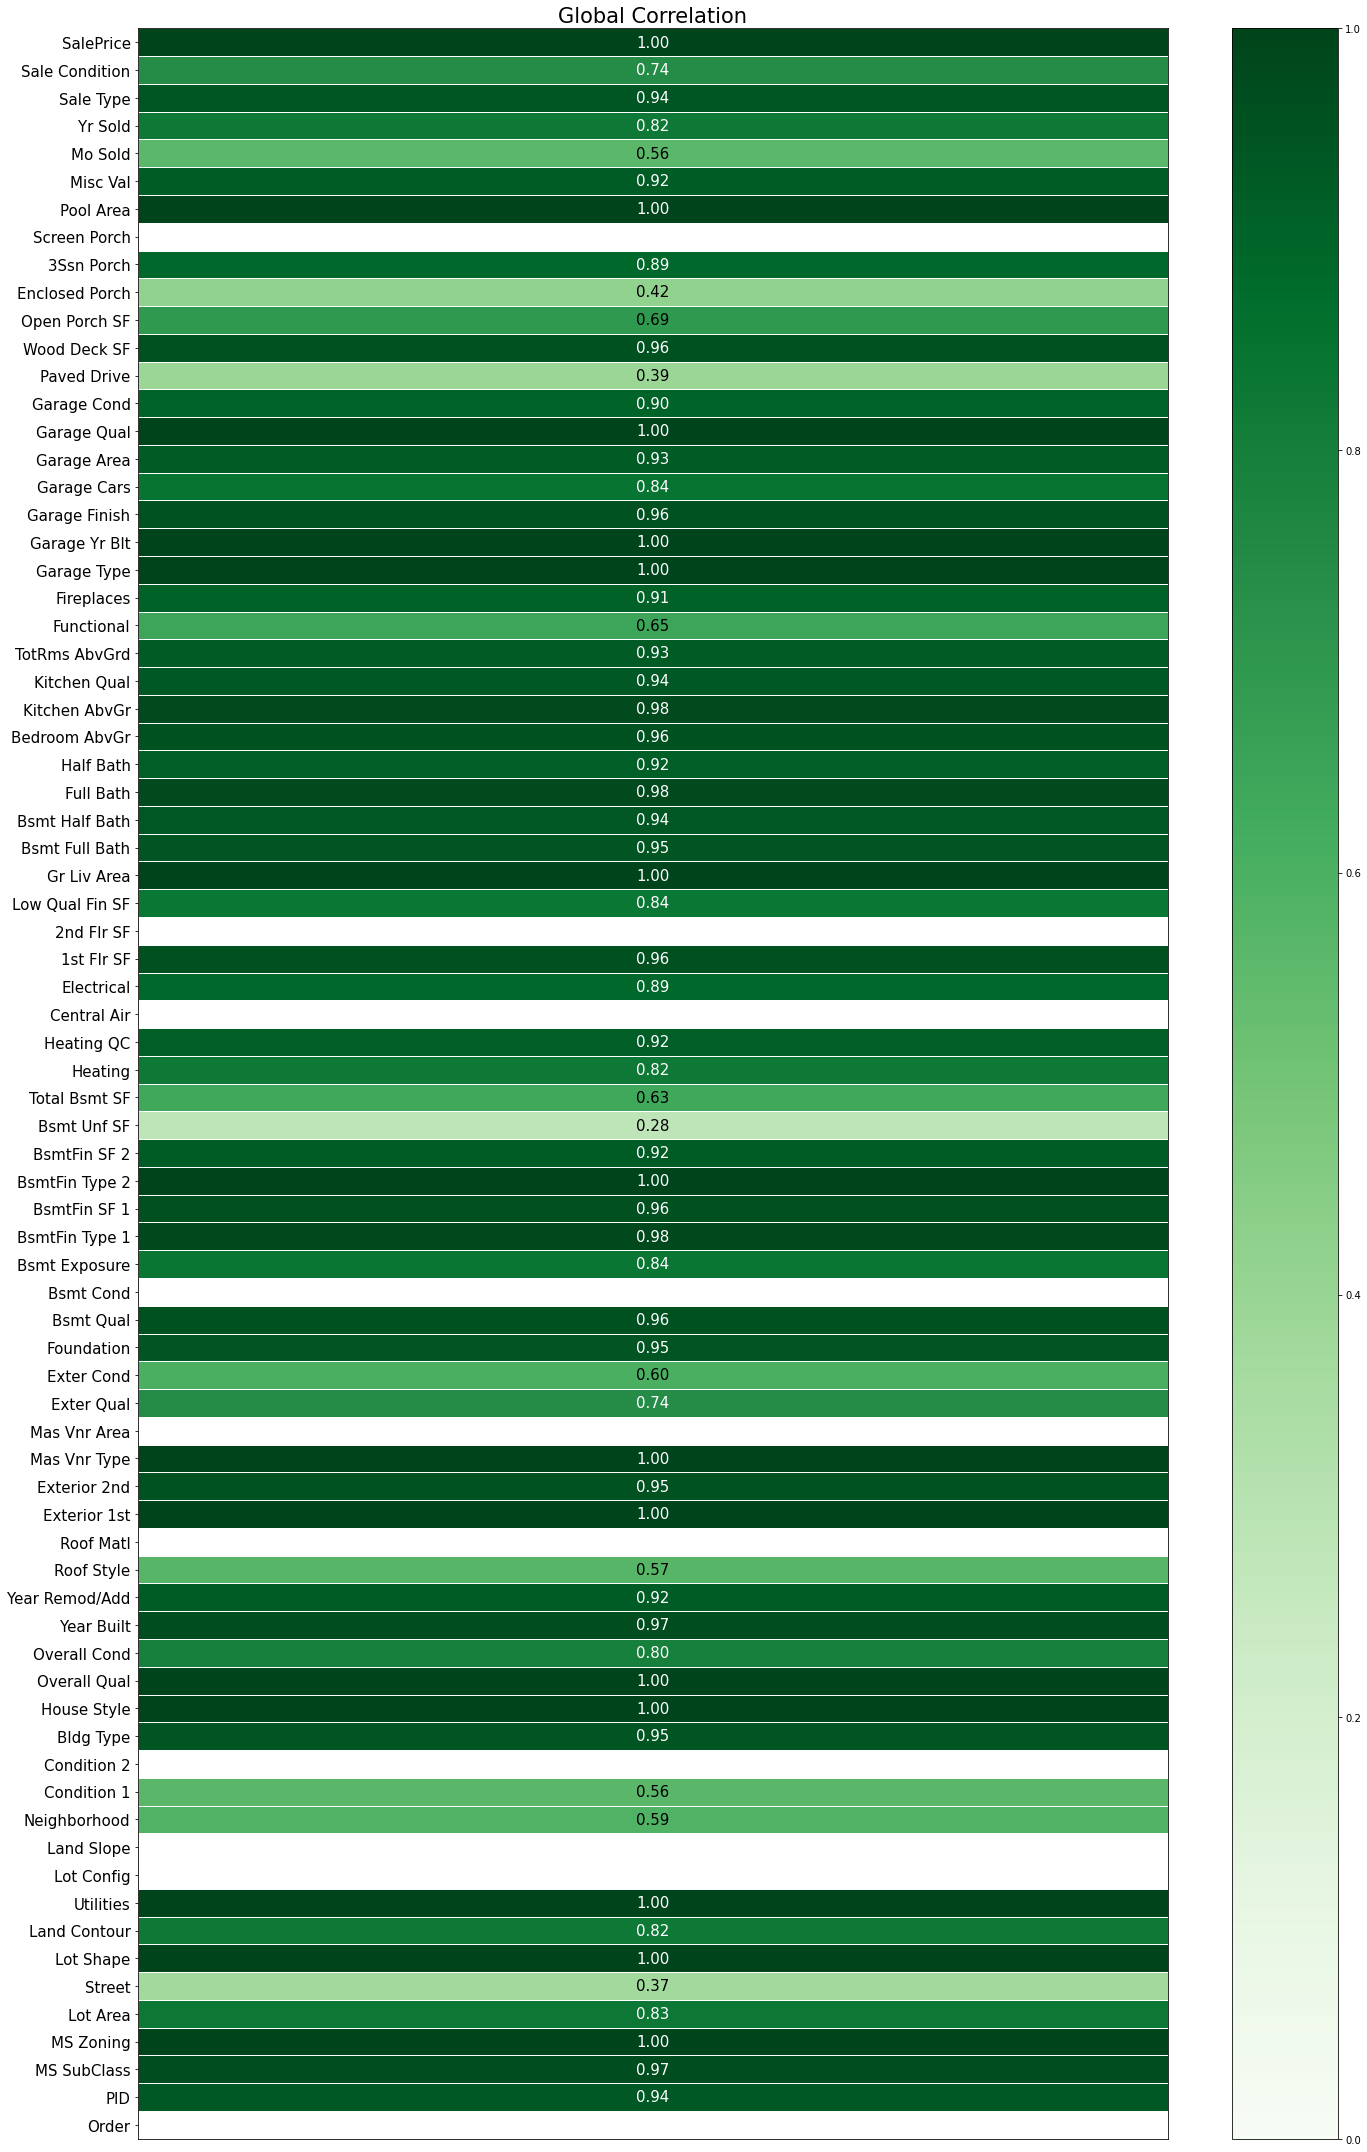

In [14]:
global_correlation, global_labels = data.global_phik()

plot_correlation_matrix(global_correlation, 
                       x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(20,30),
                        color_map="Greens", title=r"Global Correlation",
                        fontsize_factor=1.5)
plt.tight_layout()

# 

## 1C. Podstawowe statystyki oraz wizualizację rozkładów zmiennych niezależnych

# 


W celu kalkulacji miar ogólnych oraz podstawowych wizualizacji, zastosowana została biblioteka pandas_profiling [Dokumentacja](https://pandas-profiling.ydata.ai/docs/master/index.html)  | [Implementacja w Streamlit](https://dataprofiling.streamlitapp.com/).
Narzędzie to pozwala na bardzo szczegółową analize zbiorów danych. W podstawowej wersji generowane są następujące informacje:
- Analiza kompletności danych
- Statystyki pozycyjne
- Statystyki opisowe
- Histogramy rozkładu
- Dominanty
- Wartości odstające

Dane nie zostały podzielone na zbiory treningowy i walidacyjny ze względu na to, że punkt pierwszy nie wymaga weryfikacji modelowania. 

In [15]:
profile = data.profile_report(
    title="Report without correlations",
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    },
    minimal = True
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 

## 1D. Sprawdzenie rozkładu klas zmiennej objaśnianej

# 

Z raportu wygenerowanego przez pandas_profiling wiadomo już jak wygląda rozkład danych, są tam też parametry, które wskazują na charakter rozkłau m.in średnia, mediana, skośność czy kurtoza.

Python może to jednak zrobić bezboleśnie dla nas za pomocą biblioteki [FITTER](https://fitter.readthedocs.io/en/latest/) 

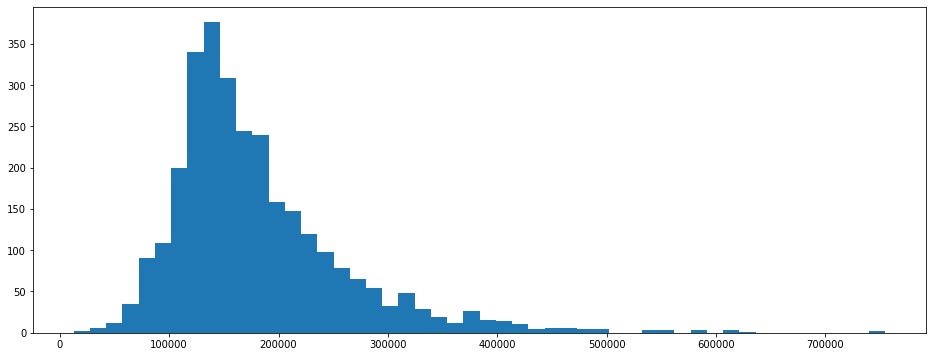

In [16]:
SalePrice = data["SalePrice"].values

plt.figure(figsize=(16,6))
SalePrice_hist = plt.hist(SalePrice, bins=50)

In [17]:
print('popularne rozkłady:',get_common_distributions())
print('wszystkie dostepne rozkłady :',get_distributions())

popularne rozkłady: ['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']
wszystkie dostepne rozkłady : ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nc

Fitting 106 distributions:  25%|█████████████▏                                        | 26/106 [00:11<00:39,  2.00it/s]c:\users\kamil\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_continuous_distns.py:3102: IntegrationWarning:

The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.

c:\users\kamil\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_continuous_distns.py:3102: IntegrationWarning:

The integral is probably divergent, or slowly convergent.

Fitting 106 distributions:  75%|████████████████████████████████████████▏             | 79/106 [01:15<00:53,  1.99s/it]c:\users\kamil\appdata\local\programs\python\python39\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  

sumsquare_error          aic           bic  kl_div  \
laplace_asymmetric     1.150717e-11  3076.291240 -97166.519969     inf   
johnsonsu              1.667621e-11  3058.371080 -96071.469531     inf   
exponnorm              1.863510e-11  3106.066912 -95754.035710     inf   
fisk                   2.598162e-11  3075.585263 -94780.272972     inf   
alpha                  2.748285e-11  3099.690618 -94615.686022     inf   

                    ks_statistic  ks_pvalue  
laplace_asymmetric      0.014773   0.539751  
johnsonsu               0.024229   0.063082  
exponnorm               0.026330   0.033800  
fisk                    0.036141   0.000924  
alpha                   0.034058   0.002181

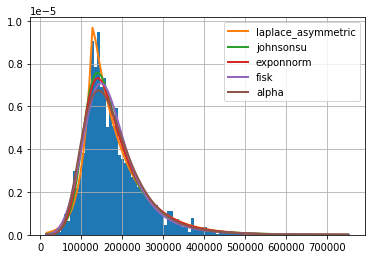

In [18]:
# trying to fit data distribution into one of popular distributions

f = Fitter(SalePrice)
f.fit()
f.summary()

In [19]:
# choosing best fit for data
f.get_best(method = 'sumsquare_error')

{'laplace_asymmetric': {'kappa': 0.5619392704241011,
  'loc': 128499.99999997897,
  'scale': 42949.679716288505}}

Dopasowanie rozkładu w tej bibliotece można postrzegać przez różne kryteria takie jak:
- błąd sumy kwadratów (im mniejszy tym lepiej)
- kryteria informacyjne Akaike(aic) oraz Bayesowskie kryterium Schwarza(bic) - (im niższe tym lepsze)
- KL Divergence - ma zastosowanie przy porównywaniu rozkładów (jeśli są identyczne, wtedy 0 a im bardziej różne tym wartość jest wyższa)
- test Kolmogorova–Smirnova (do porównywania rozkładów) - (im mniejszy tym lepiej)
- istotność testu Kolmogorova–Smirnova - (im mniejszy tym lepiej)

Wyniki dla każdej miary są inne.

                    sumsquare_error          aic           bic  kl_div  \
laplace_asymmetric     1.150717e-11  3076.291240 -97166.519969     inf   
johnsonsu              1.667621e-11  3058.371080 -96071.469531     inf   
exponnorm              1.863510e-11  3106.066912 -95754.035710     inf   
fisk                   2.598162e-11  3075.585263 -94780.272972     inf   
alpha                  2.748285e-11  3099.690618 -94615.686022     inf   
moyal                  3.019415e-11  3113.513555 -94347.997227     inf   
invgamma               3.131661e-11  3134.506451 -94233.067968     inf   
betaprime              3.221017e-11  3138.770036 -94142.654143     inf   
f                      3.270396e-11  3136.918366 -94098.077421     inf   
genlogistic            3.313074e-11  3202.040139 -94068.071334     inf   

                    ks_statistic     ks_pvalue  
laplace_asymmetric      0.014773  5.397513e-01  
johnsonsu               0.024229  6.308189e-02  
exponnorm               0.026330  3.37

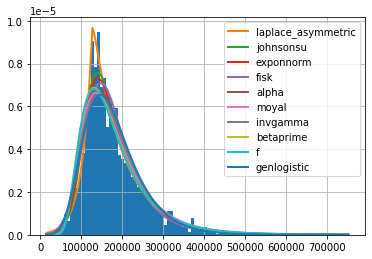

In [20]:
print(f.summary(Nbest=10))

##### CSS

In [21]:
# Some custom formatting 
HTML("""
<style>
h1 {
    text-align:center;
    color:#008080;
}
h2 {
    text-align:center;
    color:#008080;
}

div.inner_cell {
    background-color: #F0F8FF;
}

</style>
""")